In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)

In [5]:
df_customers = pd.read_csv("customers.csv")
df_loans = pd.read_csv("loans.csv")
df_bureau = pd.read_csv("bureau_data.csv")

In [6]:
df_customers.shape, df_loans.shape, df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [7]:
df_customers.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [8]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [9]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [10]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 50000


inflow = np.random.normal(50000, 15000, n).clip(5000, None).astype(int)

spend = (inflow * np.random.uniform(0.2, 0.95, n)).astype(int)

loan_perf = np.random.choice([0,1,2,3], size=n, p=[0.15,0.35,0.35,0.15])

past_loans = np.random.poisson(2, n)

defaults = np.random.binomial(p=0.1, n=past_loans)

base_score = 300 + (loan_perf * 150) + np.random.normal(0, 40, n)
credit_score = np.clip(base_score, 300, 900).astype(int)

avg_balance = (inflow - spend) * np.random.uniform(0.5, 1.5, n)
avg_balance = avg_balance.clip(0, None).astype(int)

df_transaction = pd.DataFrame({
    "cust_id": cust_ids,
    "monthly_inflow": inflow,
    "monthly_spend": spend,
    "avg_monthly_balance": avg_balance,
    "past_loan_count": past_loans,
    "past_defaults": defaults,
    "loan_performance_rating": loan_perf,
    "credit_score": credit_score
})

NameError: name 'cust_ids' is not defined

In [11]:
df_transaction.head()

NameError: name 'df_transaction' is not defined

In [12]:
df=df_customers.merge(df_loans, on='cust_id')
df=df.merge(df_transaction, on='cust_id')
df=df.merge(df_bureau, on='cust_id')


NameError: name 'df_transaction' is not defined

In [13]:
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,49340.00,444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,77660.00,698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,43400.00,390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,34940.00,314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,90400.00,813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


# Data Cleaning

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [16]:
df.describe()

,age,income,number_of_dependants,years_at_current_address,zipcode,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,39.55,2640897.50,1.94,16.02,419090.86,4704827.52,3999678.80,80494.71,719942.18,3199743.04,25.94,1337636.04,989126.38
std,9.85,2629441.06,1.54,8.93,168982.67,6267276.39,5376552.03,117312.26,967779.37,4301241.63,12.43,1214713.89,1046071.89
min,18.00,0.00,0.00,1.00,110001.00,0.00,0.00,0.00,0.00,0.00,6.00,-1.00,0.00
25%,33.00,803000.00,0.00,8.00,302001.00,1147000.00,967000.00,19340.00,174060.00,773600.00,16.00,424799.00,287007.50
50%,40.00,1892000.00,2.00,16.00,400001.00,2656000.00,2240000.00,44800.00,403200.00,1792000.00,24.00,1002309.00,668525.00
75%,46.00,3332250.00,3.00,24.00,560001.00,5172250.00,4611000.00,92240.00,829980.00,3688800.00,35.00,1790751.00,1238667.00
max,70.00,11999000.00,5.00,31.00,700001.00,52175000.00,47819000.00,5698029.90,8607420.00,38255200.00,59.00,5000000.00,7846643.00


In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 62
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
default                         0
dtype: int64

In [19]:
df.residence_type.unique()

array(['Owned', 'Mortgage', 'Rented', nan], dtype=object)

In [20]:
mode_residence = df.residence_type.mode()[0]

In [21]:
df['residence_type'] = df['residence_type'].fillna(mode_residence)


In [22]:
df.isnull().sum()

cust_id                        0
age                            0
gender                         0
marital_status                 0
employment_status              0
income                         0
number_of_dependants           0
residence_type                 0
years_at_current_address       0
city                           0
state                          0
zipcode                        0
loan_id                        0
loan_purpose                   0
loan_type                      0
sanction_amount                0
loan_amount                    0
processing_fee                 0
gst                            0
net_disbursement               0
loan_tenure_months             0
principal_outstanding          0
bank_balance_at_application    0
disbursal_date                 0
installment_start_dt           0
default                        0
dtype: int64

# EDA

### Univariate Analysis Of Numerical Feature

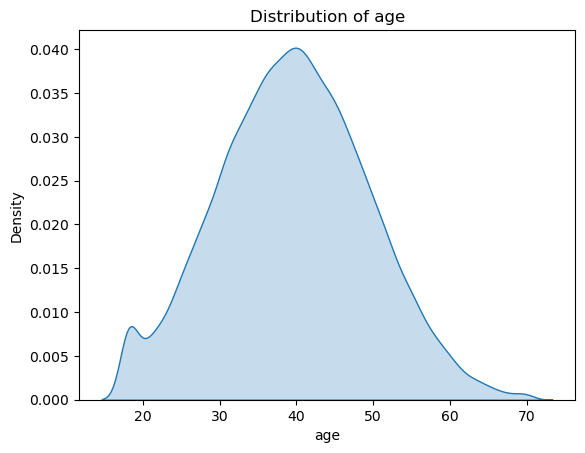

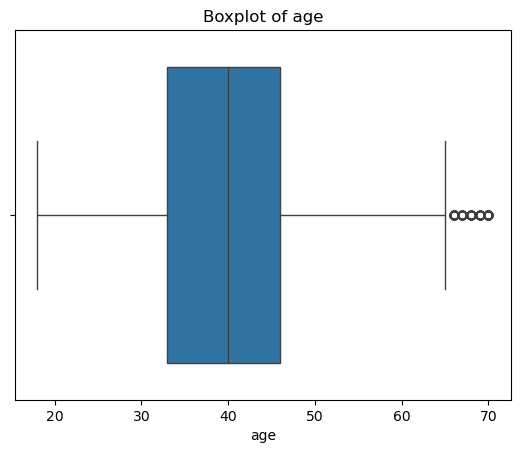

In [23]:
#Kde Plot
sns.kdeplot(data=df,x='age',fill=True)
plt.title('Distribution of age')
plt.show()

#BoxPlot
sns.boxplot(x=df['age'])
plt.title('Boxplot of age')
plt.show()

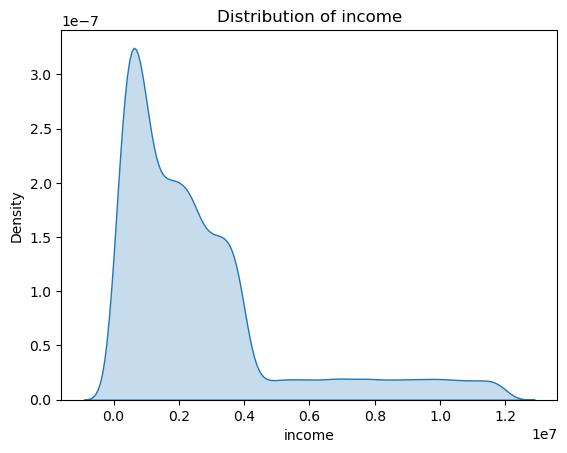

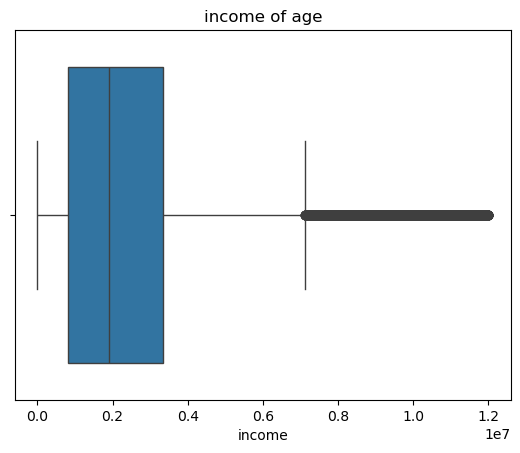

In [24]:
#Kde Plot
sns.kdeplot(data=df,x='income',fill=True)
plt.title('Distribution of income')
plt.show()

#BoxPlot
sns.boxplot(x=df['income'])
plt.title('income of age')
plt.show()

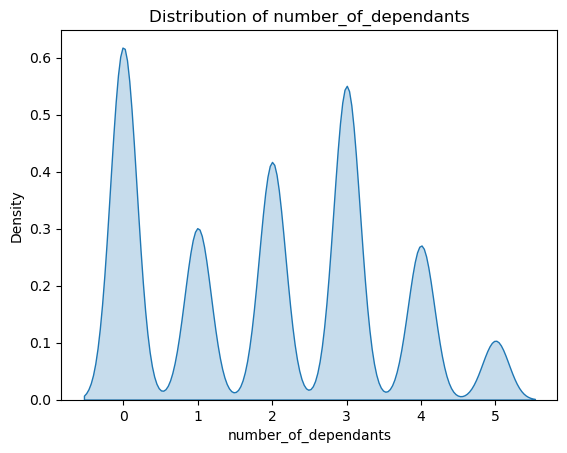

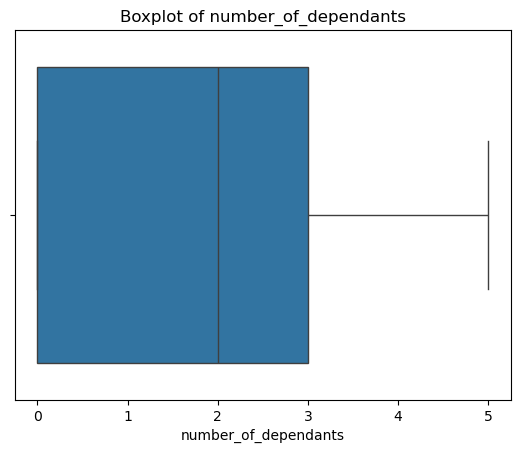

In [25]:
#Kde Plot
sns.kdeplot(data=df,x='number_of_dependants',fill=True)
plt.title('Distribution of number_of_dependants')
plt.show()

#BoxPlot
sns.boxplot(x=df['number_of_dependants'])
plt.title('Boxplot of number_of_dependants')
plt.show()

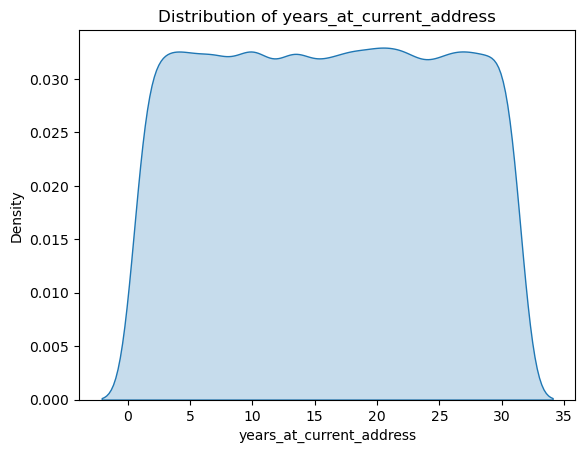

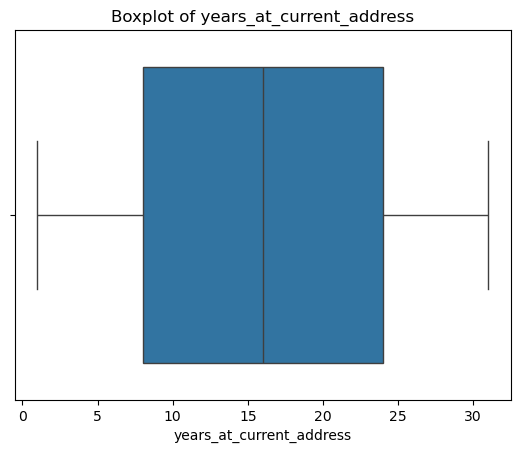

In [26]:
#Kde Plot
sns.kdeplot(data=df,x='years_at_current_address',fill=True)
plt.title('Distribution of years_at_current_address')
plt.show()

#BoxPlot
sns.boxplot(x=df['years_at_current_address'])
plt.title('Boxplot of years_at_current_address')
plt.show()

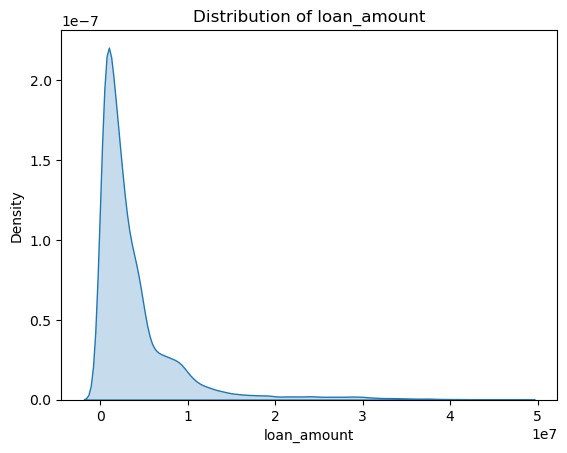

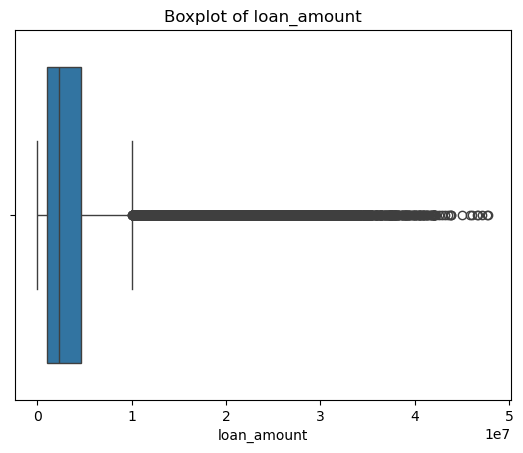

In [27]:
#Kde Plot
sns.kdeplot(data=df,x='loan_amount',fill=True)
plt.title('Distribution of loan_amount')
plt.show()

#BoxPlot
sns.boxplot(x=df['loan_amount'])
plt.title('Boxplot of loan_amount')
plt.show()

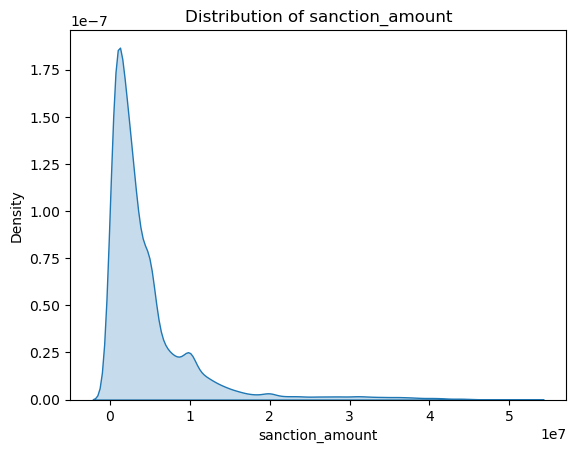

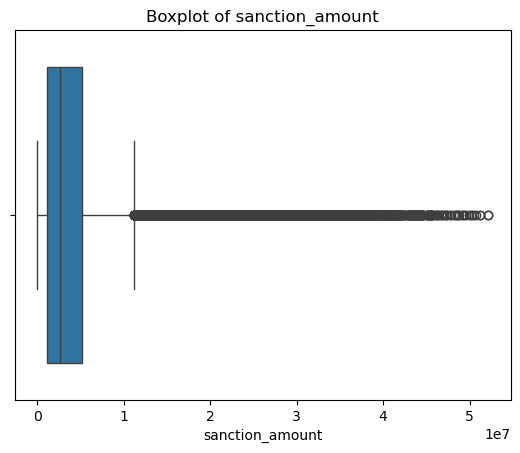

In [28]:
#Kde Plot
sns.kdeplot(data=df,x='sanction_amount',fill=True)
plt.title('Distribution of sanction_amount')
plt.show()

#BoxPlot
sns.boxplot(x=df['sanction_amount'])
plt.title('Boxplot of sanction_amount')
plt.show()

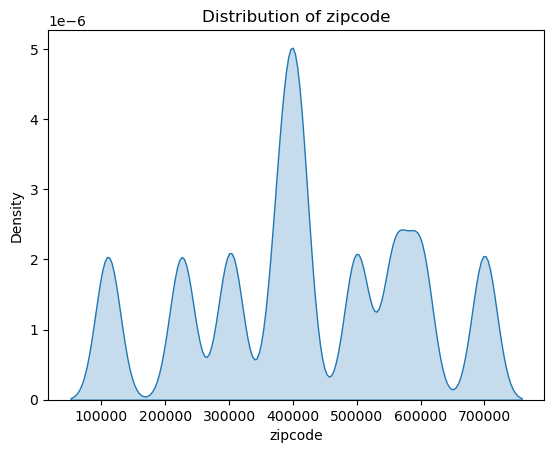

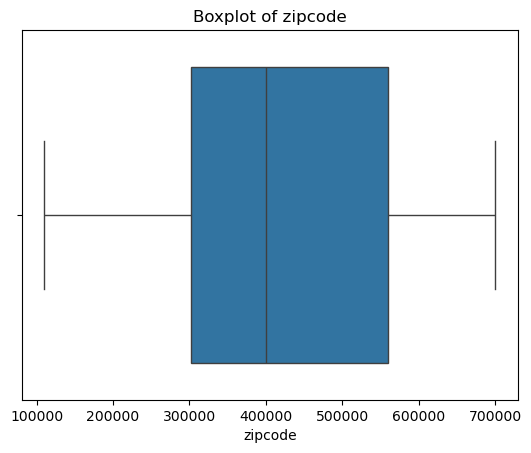

In [29]:
#Kde Plot
sns.kdeplot(data=df,x='zipcode',fill=True)
plt.title('Distribution of zipcode')
plt.show()

#BoxPlot
sns.boxplot(x=df['zipcode'])
plt.title('Boxplot of zipcode')
plt.show()

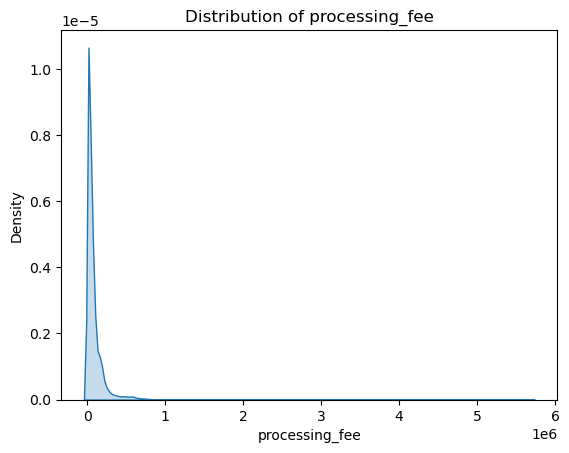

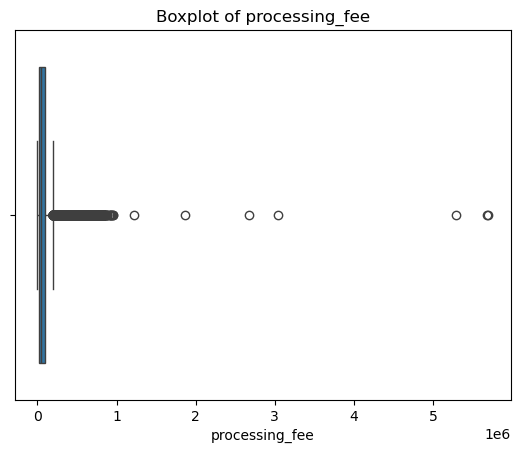

In [30]:
#Kde Plot
sns.kdeplot(data=df,x='processing_fee',fill=True)
plt.title('Distribution of processing_fee')
plt.show()

#BoxPlot
sns.boxplot(x=df['processing_fee'])
plt.title('Boxplot of processing_fee')
plt.show()

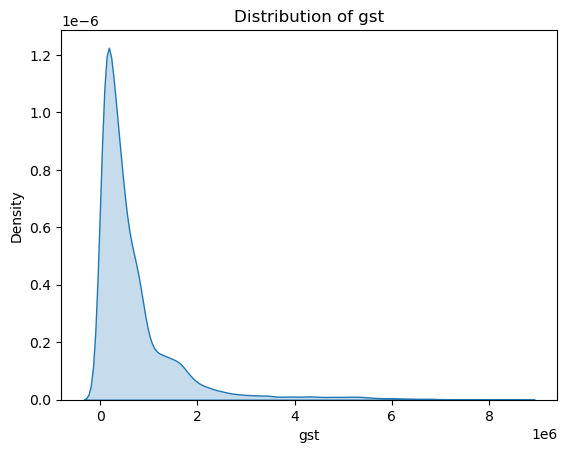

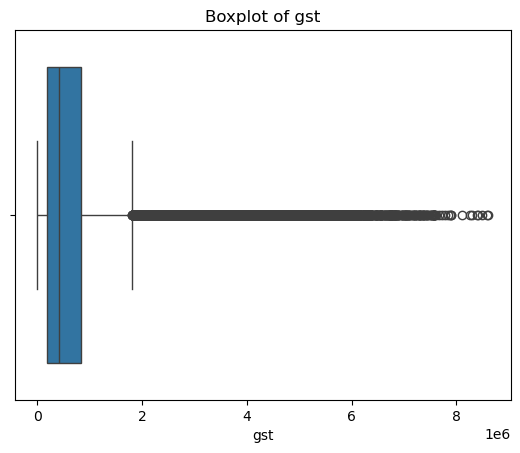

In [31]:
#Kde Plot
sns.kdeplot(data=df,x='gst',fill=True)
plt.title('Distribution of gst')
plt.show()

#BoxPlot
sns.boxplot(x=df['gst'])
plt.title('Boxplot of gst')
plt.show()

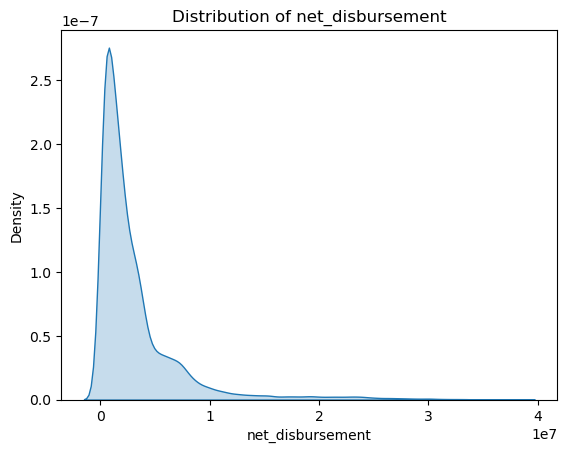

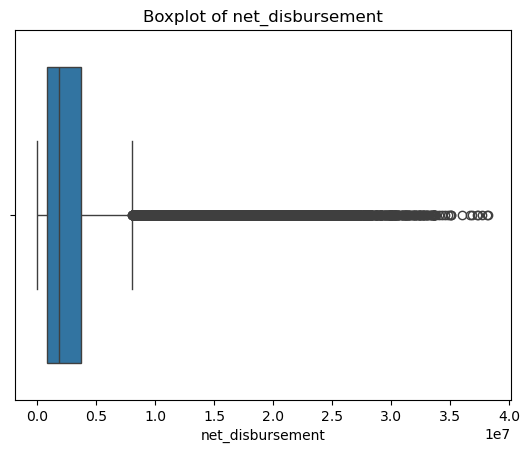

In [32]:
#Kde Plot
sns.kdeplot(data=df,x='net_disbursement',fill=True)
plt.title('Distribution of net_disbursement')
plt.show()

#BoxPlot
sns.boxplot(x=df['net_disbursement'])
plt.title('Boxplot of net_disbursement')
plt.show()

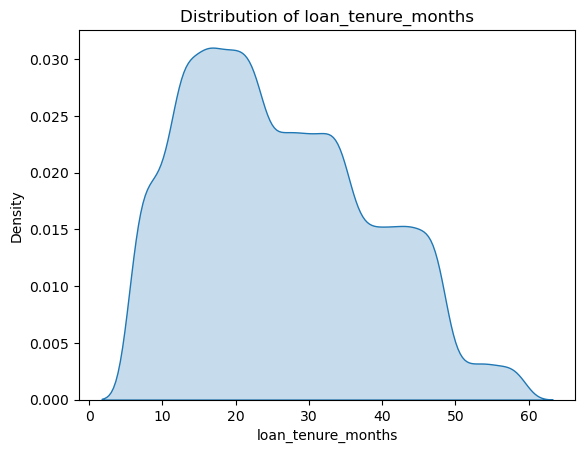

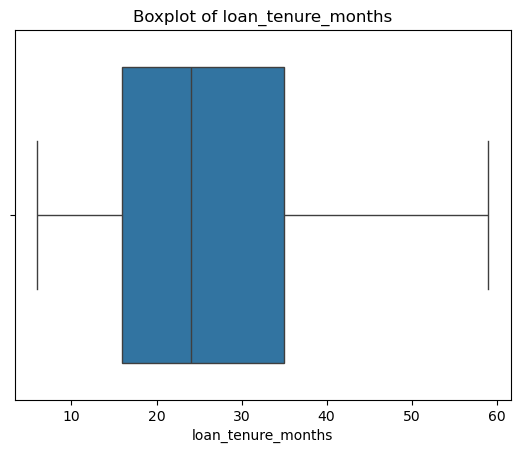

In [33]:
#Kde Plot
sns.kdeplot(data=df,x='loan_tenure_months',fill=True)
plt.title('Distribution of loan_tenure_months')
plt.show()

#BoxPlot
sns.boxplot(x=df['loan_tenure_months'])
plt.title('Boxplot of loan_tenure_months')
plt.show()

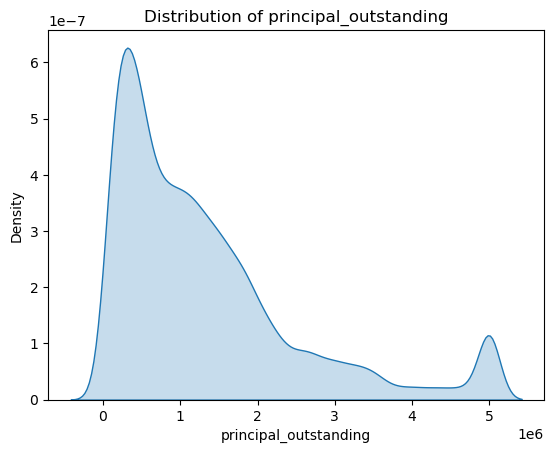

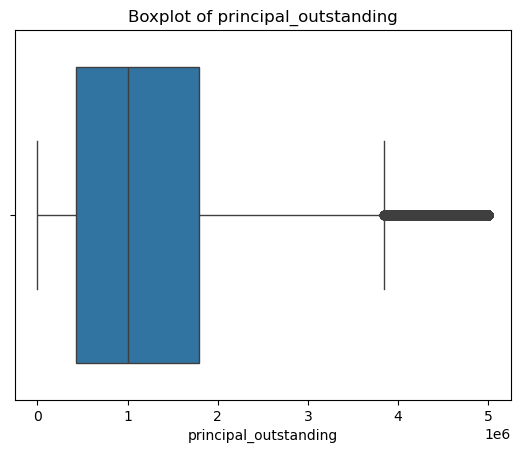

In [34]:

#Kde Plot
sns.kdeplot(data=df,x='principal_outstanding',fill=True)
plt.title('Distribution of principal_outstanding')
plt.show()

#BoxPlot
sns.boxplot(x=df['principal_outstanding'])
plt.title('Boxplot of principal_outstanding')
plt.show()

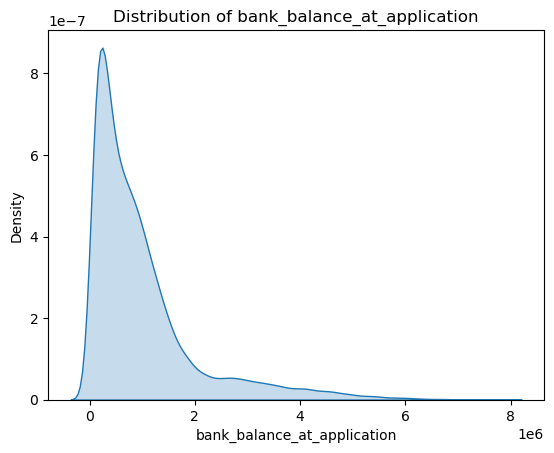

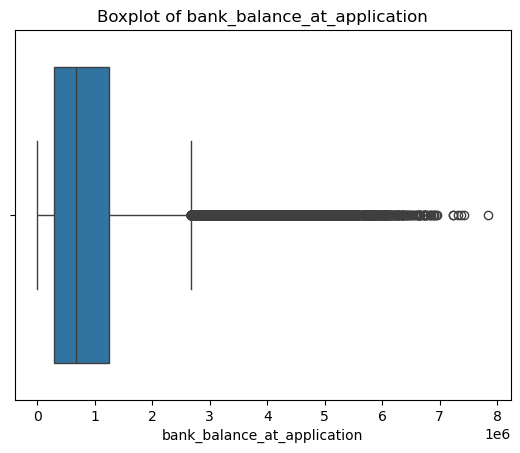

In [35]:

#Kde Plot
sns.kdeplot(data=df,x='bank_balance_at_application',fill=True)
plt.title('Distribution of bank_balance_at_application')
plt.show()

#BoxPlot
sns.boxplot(x=df['bank_balance_at_application'])
plt.title('Boxplot of bank_balance_at_application')
plt.show()

In [37]:

#Kde Plot
sns.kdeplot(data=df,x='monthly_inflow',fill=True)
plt.title('Distribution of monthly_inflow')
plt.show()

#BoxPlot
sns.boxplot(x=df['monthly_inflow'])
plt.title('Boxplot of monthly_inflow')
plt.show()

ValueError: Could not interpret value `monthly_inflow` for `x`. An entry with this name does not appear in `data`.

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='monthly_spend',fill=True)
plt.title('Distribution of monthly_spend')
plt.show()

#BoxPlot
sns.boxplot(x=df['monthly_spend'])
plt.title('Boxplot of monthly_spend')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='avg_monthly_balance',fill=True)
plt.title('Distribution of avg_monthly_balance')
plt.show()

#BoxPlot
sns.boxplot(x=df['avg_monthly_balance'])
plt.title('Boxplot of avg_monthly_balance')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='past_loan_count',fill=True)
plt.title('Distribution of past_loan_count')
plt.show()

#BoxPlot
sns.boxplot(x=df['past_loan_count'])
plt.title('Boxplot of past_loan_count')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='past_defaults',fill=True)
plt.title('Distribution of past_defaults')
plt.show()

#BoxPlot
sns.boxplot(x=df['past_defaults'])
plt.title('Boxplot of past_defaults')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='loan_performance_rating',fill=True)
plt.title('Distribution of loan_performance_rating')
plt.show()

#BoxPlot
sns.boxplot(x=df['loan_performance_rating'])
plt.title('Boxplot of loan_performance_rating')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='credit_score',fill=True)
plt.title('Distribution of credit_score')
plt.show()

#BoxPlot
sns.boxplot(x=df['credit_score'])
plt.title('Boxplot of credit_score')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='number_of_open_accounts',fill=True)
plt.title('Distribution of number_of_open_accounts')
plt.show()

#BoxPlot
sns.boxplot(x=df['number_of_open_accounts'])
plt.title('Boxplot of number_of_open_accounts')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='number_of_closed_accounts',fill=True)
plt.title('Distribution of number_of_closed_accounts')
plt.show()

#BoxPlot
sns.boxplot(x=df['number_of_closed_accounts'])
plt.title('Boxplot of number_of_closed_accounts')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='total_loan_months',fill=True)
plt.title('Distribution of total_loan_months')
plt.show()

#BoxPlot
sns.boxplot(x=df['total_loan_months'])
plt.title('Boxplot of total_loan_months')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='delinquent_months',fill=True)
plt.title('Distribution of delinquent_months')
plt.show()

#BoxPlot
sns.boxplot(x=df['delinquent_months'])
plt.title('Boxplot of delinquent_months')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='total_dpd',fill=True)
plt.title('Distribution of total_dpd')
plt.show()

#BoxPlot
sns.boxplot(x=df['total_dpd'])
plt.title('Boxplot of total_dpd')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='enquiry_count',fill=True)
plt.title('Distribution of enquiry_count')
plt.show()

#BoxPlot
sns.boxplot(x=df['enquiry_count'])
plt.title('Boxplot of enquiry_count')
plt.show()

In [ ]:

#Kde Plot
sns.kdeplot(data=df,x='credit_utilization_ratio',fill=True)
plt.title('Distribution of credit_utilization_ratio')
plt.show()

#BoxPlot
sns.boxplot(x=df['credit_utilization_ratio'])
plt.title('Boxplot of credit_utilization_ratio')
plt.show()

### univariate Analysis on Categorical Column

In [ ]:
sns.countplot(x='gender', data=df)
plt.figure(figsize=(6,6))
df['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                           labels=['M', 'F'],
                                           colors=['#3498db','#e67e22'])
plt.ylabel('')
plt.title('Gender Distribution')
plt.show()

In [ ]:
sns.countplot(x='marital_status', data=df)
plt.figure(figsize=(6,6))
df['marital_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                           labels=['Married', 'Single'],
                                           colors=['#3498db','#e67e22'])
plt.ylabel('')
plt.title('Marital status')
plt.show()

In [ ]:
sns.countplot(x='employment_status', data=df)
plt.figure(figsize=(6,6))
df['employment_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                           labels=['Self-Employed', 'Salaried'],
                                           colors=['#3498db','#e67e22'])
plt.ylabel('')
plt.title('Employment status')
plt.show()

In [ ]:
sns.countplot(x='residence_type', data=df)
plt.figure(figsize=(6,6))
df['residence_type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, 
                                           labels=['Owned', 'Mortgage', 'Mortgage'],
                                           colors=['#3498db','#e67e22','#e65e21'])
plt.ylabel('')
plt.title('residence type')
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  

sns.countplot(x='city', data=df)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Customers by City')

plt.xticks(rotation=45)      
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 6)) 

sns.countplot(x='state', data=df)

plt.xlabel('state')
plt.ylabel('Count')
plt.title('Distribution of Customers by state')

plt.xticks(rotation=45)     
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  

sns.countplot(x='loan_id', data=df)

plt.xlabel('loan_id')
plt.ylabel('Count')
plt.title('Distribution of Customers by loan_id')

plt.xticks(rotation=45)      
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  

sns.countplot(x='loan_purpose', data=df)

plt.xlabel('loan_purpose')
plt.ylabel('Count')
plt.title('Distribution of Customers by loan_purpose')

plt.xticks(rotation=45)      
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  

sns.countplot(x='loan_type', data=df)

plt.xlabel('loan_type')
plt.ylabel('Count')
plt.title('Distribution of Customers by loan_type')

plt.xticks(rotation=45)      
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  

sns.countplot(x='disbursal_date', data=df)

plt.xlabel('disbursal_date')
plt.ylabel('Count')
plt.title('Distribution of Customers by disbursal_date')

plt.xticks(rotation=45)      
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  

sns.countplot(x='installment_start_dt', data=df)

plt.xlabel('installment_start_dt')
plt.ylabel('Count')
plt.title('Distribution of Customers by installment_start_dt')

plt.xticks(rotation=45)      
plt.tight_layout()

plt.show()

In [ ]:
plt.figure(figsize=(8, 6))  

sns.countplot(x='loan_performance_rating', data=df)

plt.xlabel('loan_performance_rating')
plt.ylabel('Count')
plt.title('Distribution of Customers by loan_performance_rating')

plt.xticks(rotation=45)      
plt.tight_layout()

plt.show()

### Bivariate and Multivariate Analysis

#### EXPECTATION 1: Identify Risky Applicants

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='default', y='credit_score', data=df)
plt.title('Credit Score vs Loan Default')
plt.show()


## It Meets Expection 1 and 3

In [ ]:
plt.figure(figsize=(6,4))
sns.kdeplot(data=df, x='credit_utilization_ratio', hue='default', fill=True)
plt.title('Credit Utilization by Default Status')
plt.show()

## This plot shows how credit utilization differs 
## between customers who defaulted and those who did not default.
## High credit utilization is a strong warning sign of financial stress.

## It meets Expection 1 and Expection 3

### EXPECTATION 2: Increase Approval for Good Customers

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='income',
    y='loan_amount',
    hue='default',
    alpha=0.5
)
plt.title('Income vs Loan Amount by Default')
plt.show()


# customer with higher income relative to their loan amount are less likely to default
# This meets expection 2

### EXPECTATION 3: Explainable Decisions

In [ ]:
default_rate = df.groupby('loan_type')['default'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='loan_type', y='default', data=default_rate)
plt.title('Default Rate by Loan Type')
plt.ylabel('Default Rate')
plt.show()

# meet expection 3

### EXPECTATION 4: Fairness & Bias Mitigation

In [ ]:
fairness = df.groupby('gender')['default'].mean().reset_index()

plt.figure(figsize=(4,4))
sns.barplot(x='gender', y='default', data=fairness)
plt.title('Default Rate by Gender (Fairness Check)')
plt.ylabel('Default Rate')
plt.show()

# meet expection 4

# ONE HOT ENCODING 


In [ ]:
# Original categorical columns you WANT to encode
categorical_cols = [
    'gender',
    'marital_status',
    'employment_status',
    'residence_type',
    'loan_purpose',
    'loan_type'
]

categorical_cols = [col for col in categorical_cols if col in df.columns]

print("Encoding columns:", categorical_cols)

# Apply get_dummies only if there are columns left
if categorical_cols:
    df = pd.get_dummies(
        df,
        columns=categorical_cols,
        drop_first=True
    )

df.head(3)


In [ ]:
df.head()

### Scaling

In [ ]:
X = df.drop('default', axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=df['default'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\ujwal\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:919: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


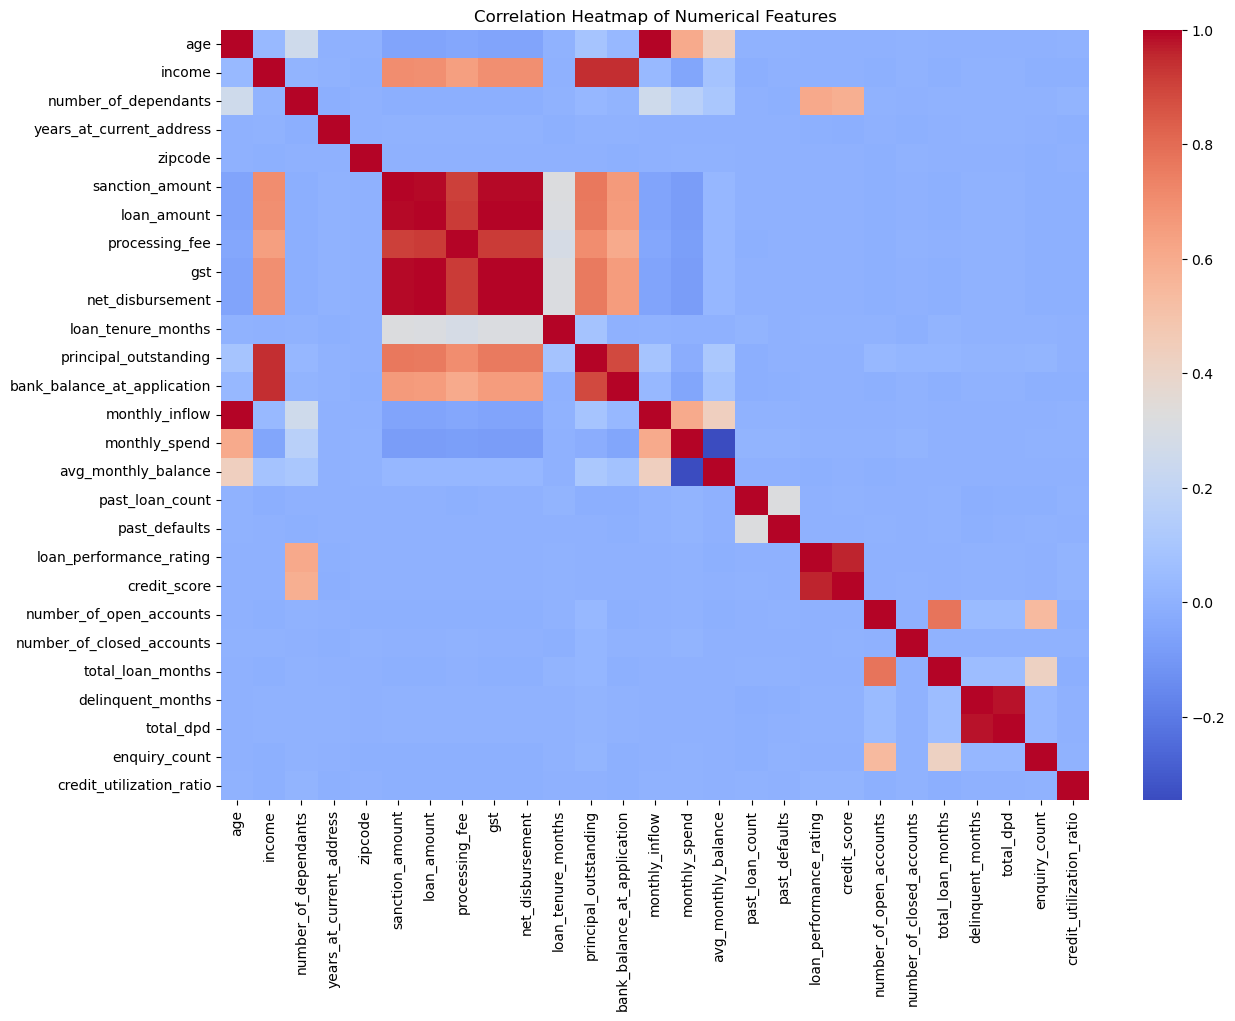

In [75]:
numeric_df = df.select_dtypes(include=['int64', 'float64', 'int32'])

plt.figure(figsize=(14, 10))
sns.heatmap(
    numeric_df.corr(),
    cmap='coolwarm',
    annot=False
)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Model Selection for Cross validation


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

In [3]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Logistic Regression CV scores:", cv_scores)
print("Average CV accuracy:", np.mean(cv_scores))

NameError: name 'X_train_scaled' is not defined